# 소프트맥스회귀
## 1. 원-핫 인코딩이란?
- 원-핫 인코딩은 선택해야 하는 선택지의 개수만큼 차원을가지면서, 각 선택지의 인덱스에 해당하는 원소에는 1, 나머지 원소는 0의 값을 가지도록 하는 표현 방법이다.
- 원-핫 인코딩으로 표현된 벡터를 원-핫 벡터라고 한다.

## 2. 원-핫 벡터의 무작위성
- 꼭 실제값을 원-핫 벡터로 표현해야만 다중 클래스 분류 문제를 풀 수 있는 것은 아니지만, 대부분의 다중 클래스 분류 문제가 각 클래스 간의 관계가 균등하다는 점에서 원-핫 벡터는 이러한 점을 표현할 수 있는 적절한 표현 방법이다.



## 1. 다중 클래스 분류
- 이진 분류가 두 개의 답 중 하나를 고르는 문제였다면, 세 개 이상의 답 중 하나를 고르는 문제를 다중 클래스 분류라고 한다.

## 2. 소프트맥스 함수
- 소프트 맥스 함수는 분류해야하는 정답지의 총 개수를 k라고 할 때, k차원의 벡터를 입력받아 각 클래스에 대한 확률을 추정한다.
- 1) 소프트맥스 함수의 이해
  - k차원의 벡터에서 i번째 원소를 $z_i$, i번재 클래스가 정답일 확률을 $p_i$로 나타낸다고 하였을 때 소프트맥스 함수는 $p_i$를 다음과 같이 정의한다.
  - $p_i = \frac{e^zi}{∑e^zi}$ **for i = 1, 2, ...k**

## 3. 비용 함수
- 소프트맥스 회귀에서는 비용 함수로 크로스 엔트로피 함수를 사용한다.
- $cost(W) = -∑y_jlog(p_j)$


In [1]:
# 소프트맥스 회귀의 비용함수 구현
import torch
import torch.nn.functional as F
torch.manual_seed(1)

In [3]:
# 1) 파이토치로 소프트맥스의 비용 함수 구현하기(로우-레벨)
z = torch.FloatTensor([1, 2, 3])
hypothesis = F.softmax(z, dim=0)
print(hypothesis)

tensor([0.0900, 0.2447, 0.6652])


In [4]:
print(hypothesis.sum())

tensor(1.)


In [5]:
z = torch.rand(3, 5, requires_grad=True)
hypothesis = F.softmax(z, dim=1) # 각 샘플에 대해서 소프트맥스 함수를 적용하여야 하므로 두 번째 차원에 대해서 함수 적용한다는 의미에서 dim=1
print(hypothesis)

tensor([[0.2645, 0.1639, 0.1855, 0.2585, 0.1277],
        [0.2430, 0.1624, 0.2322, 0.1930, 0.1694],
        [0.2226, 0.1986, 0.2326, 0.1594, 0.1868]], grad_fn=<SoftmaxBackward0>)


In [6]:
y = torch.randint(5, (3,)).long()
print(y)

tensor([0, 2, 1])


In [8]:
# 모든 원소가 0의 값을 가진 3 x 5 텐서 생성
y_one_hot = torch.zeros_like(hypothesis)
# y.unsqueeze(1)를 하면, (3,)의 크기를 가졌던 y 텐서는 (3x1) 텐서가 된다.
# scatter의 첫 번째 인자로 dim=1에 대해서 수행하라고 알려줌
# 세 번째 인자에 숫자 1을 넣어주므로서 두 번째 인자인 y_unsqueeze(1)이 알려주는 위치에 숫자 1을 넣도록 한다.
y_one_hot.scatter_(1, y.unsqueeze(1), 1)

tensor([[1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0.]])

In [12]:
cost = (y_one_hot * -torch.log(hypothesis)).sum(dim=1).mean()
print(cost)

tensor(1.4689, grad_fn=<MeanBackward0>)


In [13]:
# 2) 파이토치로 소프트맥스의 비용 함수 구현하기 (하이-레벨)
# 앞서 소프트맥스 함수의 결과에 로그를 씌울 때는 다음과 같이 소프트맥스 함수의 출력값을 로그 함수의 입력으로 사용
# Low level
torch.log(F.softmax(z, dim=1))

tensor([[-1.3301, -1.8084, -1.6846, -1.3530, -2.0584],
        [-1.4147, -1.8174, -1.4602, -1.6450, -1.7758],
        [-1.5025, -1.6165, -1.4586, -1.8360, -1.6776]], grad_fn=<LogBackward0>)

In [14]:
# High level
# 파이토치에서는 두 개의 함수를 결합한 F.log_softmax()라는 도구를 제공한다.
F.log_softmax(z, dim=1)

tensor([[-1.3301, -1.8084, -1.6846, -1.3530, -2.0584],
        [-1.4147, -1.8174, -1.4602, -1.6450, -1.7758],
        [-1.5025, -1.6165, -1.4586, -1.8360, -1.6776]],
       grad_fn=<LogSoftmaxBackward0>)

In [16]:
# 로우-레벨로 구현한 비용 함수
# Low level
# 첫 번째 수식
(y_one_hot * -torch.log(F.softmax(z, dim=1))).sum(dim=1).mean()

tensor(1.4689, grad_fn=<MeanBackward0>)

In [19]:
# torch.log(F.softmax(z, dim=1))을 F.log_softmax()로 대체
# 두 번째 수식
(y_one_hot * -torch.log_softmax(z, dim=1)).sum(dim=1).mean()

tensor(1.4689, grad_fn=<MeanBackward0>)

In [20]:
# High level
# 세번째 수식
# 두 번째 수식을 간단하게 하면 F.nll_loss()를 사용하면 됨.
# nll_loss를 사용할 때에는 원핫벡터 대신 실제값을 넣으면 됨.
# nll은 Negative Log Likelihood의 약자이다.
F.nll_loss(F.log_softmax(z, dim=1), y)

tensor(1.4689, grad_fn=<NllLossBackward0>)

In [21]:
# 네번째 수식
# 위의 식을 더 간단하게 하면 F.cross_entropy() 사용
# F.cross_entropy는 F.log_softmax와 F.nll_loss를 포함하고 있다.
F.cross_entropy(z, y)

tensor(1.4689, grad_fn=<NllLossBackward0>)

In [27]:
# 2. 소프트맥스 회귀 구현하기
# 1) 데이터셋 준비
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
torch.manual_seed(1)

x_train = [[1, 2, 1, 1],
           [2, 1, 3, 2],
           [3, 1, 3, 4],
           [4, 1, 5, 5],
           [1, 7, 5, 5],
           [1, 2, 5, 6],
           [1, 6, 6, 6],
           [1, 7, 7, 7]]
y_train = [2, 2, 2, 1, 1, 1, 0, 0]
x_train = torch.FloatTensor(x_train)
y_train = torch.LongTensor(y_train)

In [23]:
# 2) 소프트맥스 회귀 구현하기(로우-레벨)
print(x_train.shape)
print(y_train.shape)

torch.Size([8, 4])
torch.Size([8])


In [31]:
y_one_hot = torch.zeros(8, 3)
y_one_hot.scatter_(1, y_train.unsqueeze(1), 1)
y_one_hot.scatter_(1, y_train.unsqueeze(1), 1)
print(y_one_hot.shape)

torch.Size([8, 3])


In [32]:
# 모델 초기화
W = torch.zeros((4, 3), requires_grad=True)
b = torch.zeros((1, 3), requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

  # 가설
  hypothesis = F.softmax(x_train.matmul(W) + b, dim=1)

  # 비용 함수
  cost = (y_one_hot * -torch.log(hypothesis)).sum(dim=1).mean()

  # cost로 H(x) 개선
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  # 100번마다 로그 출력
  if epoch % 100 == 0:
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, cost.item()
    ))

Epoch    0/1000 Cost: 1.098612
Epoch  100/1000 Cost: 0.704199
Epoch  200/1000 Cost: 0.622999
Epoch  300/1000 Cost: 0.565717
Epoch  400/1000 Cost: 0.515291
Epoch  500/1000 Cost: 0.467661
Epoch  600/1000 Cost: 0.421278
Epoch  700/1000 Cost: 0.375402
Epoch  800/1000 Cost: 0.329766
Epoch  900/1000 Cost: 0.285072
Epoch 1000/1000 Cost: 0.248155


In [33]:
# 3. 소프트맥스 회귀 구현하기

# 모델 초기화
W = torch.zeros((4, 3), requires_grad=True)
b = torch.zeros((1, 3), requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):
  # cost 계산
  z = x_train.matmul(W) + b
  cost = F.cross_entropy(z, y_train)

  # cost로 H(x) 개선
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  # 100번마다 로그 출력
  if epoch % 100 == 0:
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, cost.item()
    ))

Epoch    0/1000 Cost: 1.098612
Epoch  100/1000 Cost: 0.704199
Epoch  200/1000 Cost: 0.623000
Epoch  300/1000 Cost: 0.565717
Epoch  400/1000 Cost: 0.515291
Epoch  500/1000 Cost: 0.467662
Epoch  600/1000 Cost: 0.421278
Epoch  700/1000 Cost: 0.375402
Epoch  800/1000 Cost: 0.329766
Epoch  900/1000 Cost: 0.285073
Epoch 1000/1000 Cost: 0.248155


In [34]:
# 4. 소프트맥스 회귀 nn.Module로 구현하기
# 모델을 선언 및 초기화. 4개의 특성을 가지고 3개의 클래스로 분류
model = nn.Linear(4, 3)

# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=0.1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):
  # H(x) 계산
  prediction = model(x_train)

  # cost 계산
  cost = F.cross_entropy(prediction, y_train)

  # cost로 H(x) 개선
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  # 100번마다 로그 출력
  if epoch % 100 == 0:
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, cost.item()
    ))

Epoch    0/1000 Cost: 1.616785
Epoch  100/1000 Cost: 0.658891
Epoch  200/1000 Cost: 0.573443
Epoch  300/1000 Cost: 0.518151
Epoch  400/1000 Cost: 0.473265
Epoch  500/1000 Cost: 0.433516
Epoch  600/1000 Cost: 0.396563
Epoch  700/1000 Cost: 0.360914
Epoch  800/1000 Cost: 0.325392
Epoch  900/1000 Cost: 0.289178
Epoch 1000/1000 Cost: 0.254148


In [37]:
# 5. 소프트맥스 회귀 클래스 구현하기
class SoftmaxClassifierModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(4, 3)

  def forward(self, x):
    return self.linear(x)

model = SoftmaxClassifierModel()
#optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=0.1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):
  # H(x)
  prediction = model(x_train)

  # cost 계산
  cost = F.cross_entropy(prediction, y_train)

  # cost로 H(x) 개선
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  # 100번마다 로그 출력
  if epoch % 100 == 0:
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, cost.item()
    ))

Epoch    0/1000 Cost: 3.763306
Epoch  100/1000 Cost: 0.634510
Epoch  200/1000 Cost: 0.553141
Epoch  300/1000 Cost: 0.499127
Epoch  400/1000 Cost: 0.454847
Epoch  500/1000 Cost: 0.415295
Epoch  600/1000 Cost: 0.378128
Epoch  700/1000 Cost: 0.341821
Epoch  800/1000 Cost: 0.305279
Epoch  900/1000 Cost: 0.268723
Epoch 1000/1000 Cost: 0.242802


## 소프트맥스 회귀로 MNIST 데이터 분류하기

In [1]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random

USE_CUDA = torch.cuda.is_available() # GPU를 사용가능하면 True, 아니면 False 리턴
device = torch.device("cuda" if USE_CUDA else "cpu")
print('다음 기기로 학습합니다:', device)

# 랜덤 시드 고정
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
  torch.cuda.manual_seed_all(777)

# 하이퍼파라미터
training_epochs = 15
batch_size = 100

다음 기기로 학습합니다: cuda


In [2]:
# MNIST 데이터셋
# root는 MNIST를 다운받을 경로
# train은 인자로 True를 주면 MNIST의 훈련 데이터를 리턴받으며 False로 주면 테스트 데이터를 리턴받음
# transform은 현재 데이터를 파이토치 텐서로 변환해준다.
# download는 해당 경로에 MNIST 데이터가 없다면 다운로드 받겠다는 의미이다.
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)
mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:11<00:00, 877kB/s] 


Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 57.0kB/s]


Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:06<00:00, 247kB/s]


Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 4.34MB/s]

Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



In [5]:
# 데이터 로더
# dataset:로드할 대상
# batch_size:배치크기
# shuffle:매 에포크마다 미니배치를 셔플할 것인지 여부
# drop_last는 마지막 배치를 버릴 것인지를 의미
# 1000개의 데이터가 있고배치 크기가 128이라고 했을 때, 1000을 128로 나누면 총 7개가 나오고 나머지로 104개 남음.
# 남은 104개를 그냥 버릴수도 있음. 그 때 drop_last를 True로 해주면 됨
# 다른 미니배치보다 개수가 적은 마지막 배치를 경사하강법에 사용하여 마지막 배치가 상대적으로 과대평가되는 현상을 막아줌.
data_loader = DataLoader(dataset=mnist_train, batch_size=batch_size, shuffle=True, drop_last=True)

# 모델 설계
# to() 함수는 연산을 어디서 수행할지를 정한다.
# 모델을 GPU로 보낼 때, 모델에 데이터를 입력하기 전에 GPU에도 보내야 함.
# 즉, 모델, 비용함수, 데이터를 to(device)로 GPU로 보내야함.
# cpu를사용할 경우에는 필요 없지만 gpu를 사용하면 to('cuda')를 해줄 필요가 있음. 아무것도 지정하지 않으면 cpu연산
# bias는 편향 b를 사용할 것인지를 나타낸다. 기본값은 True임
linear = nn.Linear(784, 10, bias=True).to(device)

# 비용 함수와 옵티마이저 정의
criterion = nn.CrossEntropyLoss().to(device) # 내부적으로 소프트맥스 함수를 포함하고 있음
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)
# 앞에서는 torch.nn.functional.cross_entropy()를 사용했으나 여기서는 torch.nn.CrossEntropyLoss()를 사용
# 둘 다 파이토치에서 제공하는 크로스 엔트로피 함수로 소프트맥스를 포함하고 있음

for epoch in range(training_epochs):
  avg_cost = 0
  total_batch = len(data_loader)

  for X, Y in data_loader:
    # 배치 크기가 100이므로 아래의 연산에서 X는 (100, 784)의 텐서가 된다.
    X = X.view(-1, 28*28).to(device)
    # 레이블은 원-핫 인코딩이 된상태가 아니라 0~9의 정수
    Y = Y.to(device)

    optimizer.zero_grad()
    hypothesis = linear(X)
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    avg_cost += cost / total_batch

  print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 0.536714792
Epoch: 0002 cost = 0.359240860
Epoch: 0003 cost = 0.331269383
Epoch: 0004 cost = 0.316709489
Epoch: 0005 cost = 0.307221323
Epoch: 0006 cost = 0.300298870
Epoch: 0007 cost = 0.295184374
Epoch: 0008 cost = 0.290932894
Epoch: 0009 cost = 0.287400424
Epoch: 0010 cost = 0.284594417
Epoch: 0011 cost = 0.282061279
Epoch: 0012 cost = 0.279854059
Epoch: 0013 cost = 0.278027654
Epoch: 0014 cost = 0.276101291
Epoch: 0015 cost = 0.274421811
Learning finished


Accuracy: 0.8869999647140503
Label:  7
Prediction:  7


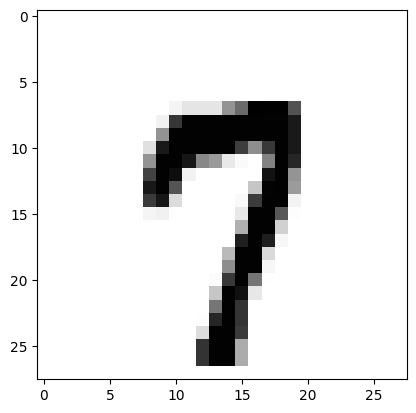

In [8]:
# 테스트 데이터를 사용하여 모델을 테스트
with torch.no_grad(): # 그레디언트 계산 수행 x
  X_test = mnist_test.test_data.view(-1, 28*28).float().to(device)
  Y_test = mnist_test.test_labels.to(device)

  prediction = linear(X_test)
  correct_prediction = torch.argmax(prediction, 1) == Y_test
  accuracy = correct_prediction.float().mean()
  print('Accuracy:', accuracy.item())

  # MNIST 테스트 데이터에서 무작위로 하나를 뽑아서 예측
  r = random.randint(0, len(mnist_test) - 1)
  X_single_data = mnist_test.test_data[r:r+1].view(-1, 28*28).float().to(device)
  Y_single_data = mnist_test.test_labels[r:r+1].to(device)

  print('Label: ', Y_single_data.item())
  single_prediction = linear(X_single_data)
  print('Prediction: ', torch.argmax(single_prediction, 1).item())

  plt.imshow(mnist_test.test_data[r:r+1].view(28, 28), cmap='Greys', interpolation='nearest')
  plt.show()